In [1]:
from scipy.misc import imread
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Leemos las imágenes y las mostramos

In [2]:
left_image = imread('input_imgs/Head-L.pgm')
rigth_image = imread('input_imgs/Head-R.pgm')

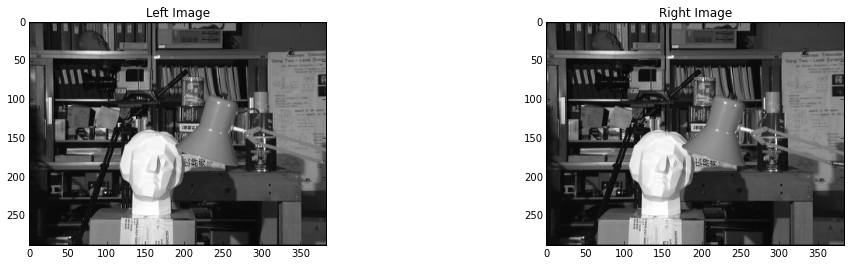

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))

ax1.set_title('Left Image')
ax1.imshow(left_image, cmap = cm.Greys_r)

ax2.set_title('Right Image')
ax2.imshow(rigth_image, cmap = cm.Greys_r)

### Algoritmos para calcular la correlación basada en SSD y la correlación normalizada

In [4]:
def is_inside(central_pixel, half_ws, max_x, max_y, d = 0):
    """ Devuelve si dado el píxel central y tamaño de la imagen 
    la ventana está dentro de la imagen 
    """
    if central_pixel[0]-half_ws < 0 or j-half_ws < 0 or j-half_ws+d < 0:
        return False
    if central_pixel[0]+half_ws+1 > max_x or j+half_ws+1 > max_y:
        return False
    return True

In [5]:
def ssd(left_image, rigth_image, central_pixel, window_size): 
    """ Cálculo de la suma de diferencias al cuadrado (SSD) """
    # Precalculamos valores estables
    half_ws = int(window_size/2)
    norm_window = 1 / (window_size * window_size)
    max_x, max_y = left_image.shape
    min_ssd=float("inf") 
    min_d=0 
        
    # Si la ventana sobre el pixel central queda dentro de la imagen calcularemos la mejor disparidad
    if is_inside(central_pixel, half_ws, max_x, max_y): 
        I1 = left_image[central_pixel[0]-half_ws:central_pixel[0]+half_ws+1, 
                        central_pixel[1]-half_ws:central_pixel[1]+half_ws+1]
        for d in range(0, -min(j, 26), -1):
            if is_inside(central_pixel, half_ws, max_x, max_y, d): 
                I2 = rigth_image[central_pixel[0]-half_ws:central_pixel[0]+half_ws+1, 
                                 central_pixel[1]-half_ws+d:central_pixel[1]+half_ws+d+1]
                ssd = norm_window * np.sum((I1.astype("float") - I2.astype("float")) ** 2)
                if ssd < min_ssd:
                    min_ssd = ssd
                    min_d = -d
        return min_d

In [6]:
window_sizes = [3, 7, 11, 25]

disparity_maps = {}
for w in window_sizes:
    disparity_maps[w] = np.zeros(left_image.shape)
    # Aplicamos ssd en ventana a todos los puntos excepto los bordes
    for i in range(1,left_image.shape[0]-1):
        for j in range(1, left_image.shape[1]-1):
            disparity_maps[w][i][j] = ssd(left_image, rigth_image, (i, j), w)


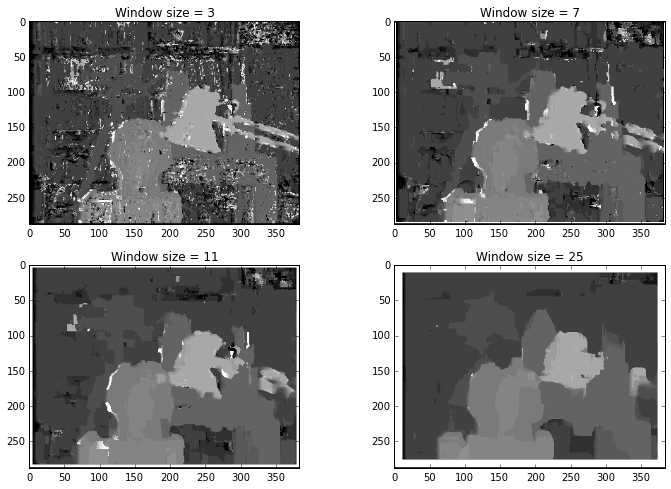

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,8)) 
window_id = 0
for ax_row in axes:
    for ax in ax_row:
        ax.set_title('Window size = {}'.format(window_sizes[window_id]) )
        ax.imshow(disparity_maps[window_sizes[window_id]], cmap = cm.Greys_r)
        window_id +=1
fig.savefig('ssd_grayscale.png')

In [8]:
def znssd(left_image, rigth_image, central_pixel, window_size): 
    # Precalculamos valores estables
    half_ws = int(window_size/2)
    norm_window = 1 / (window_size * window_size)
    max_x, max_y = left_image.shape
    min_ssd=float("inf") 
    min_d=0 
        
    # Si la ventana sobre el pixel central queda dentro de la imagen calcularemos la mejor disparidad
    if is_inside(central_pixel, half_ws, max_x, max_y): 
        I1 = left_image[central_pixel[0]-half_ws:central_pixel[0]+half_ws+1, 
                        central_pixel[1]-half_ws:central_pixel[1]+half_ws+1]
        for d in range(0, -min(j, 26), -1):
            if is_inside(central_pixel, half_ws, max_x, max_y, d): 
                I2 = rigth_image[central_pixel[0]-half_ws:central_pixel[0]+half_ws+1, 
                                 central_pixel[1]-half_ws+d:central_pixel[1]+half_ws+d+1]
                std_norm = np.std(I1.astype("float")) * np.std(I2.astype("float"))
                if  std_norm > 0:
                    ssd = norm_window * (np.sum(((I1.astype("float")-np.mean(I1.astype("float"))) 
                                                 - (I2.astype("float") - np.mean(I2.astype("float")))) ** 2)
                                         / (std_norm))
                    if ssd < min_ssd:
                        min_ssd = ssd
                        min_d = -d
        return min_d

In [9]:
window_sizes = [3, 7, 11, 25]

disparity_maps_zn = {}
for w in window_sizes:
    disparity_maps_zn[w] = np.zeros(left_image.shape)
    # Aplicamos ssd en ventana a todos los puntos excepto los bordes
    for i in range(1,left_image.shape[0]-1):
        for j in range(1, left_image.shape[1]-1):
            disparity_maps_zn[w][i][j] = znssd(left_image, rigth_image, (i, j), w)

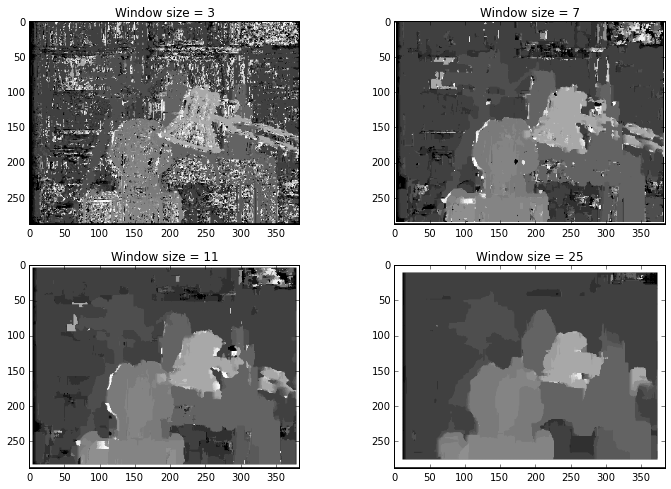

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12,8)) 
window_id = 0
for ax_row in axes:
    for ax in ax_row:
        ax.set_title('Window size = {}'.format(window_sizes[window_id]) )
        ax.imshow(disparity_maps_zn[window_sizes[window_id]], cmap = cm.Greys_r)
        window_id +=1
fig.savefig('zssd_grayscale.png')